In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
import kagglehub
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [260]:
warnings.filterwarnings('ignore')

In [261]:
path = kagglehub.dataset_download("fedesoriano/cirrhosis-prediction-dataset")

path

'/home/yashkathe/.cache/kagglehub/datasets/fedesoriano/cirrhosis-prediction-dataset/versions/2'

## Data Pre-Processing 

### Read the Data

In [262]:
df = pd.read_csv(f'{path}/{os.listdir(path)[0]}')

df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [263]:
def missing_values(df):
    missing_values = df.iloc[:, 1:].isnull()
    return missing_values.sum()

In [264]:
missing_values(df)

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

### Drop Missing Value with more than Threshold

In [265]:
# let threshold = 80% of data

threshold = 0.80 * len(df)

df = df.dropna(thresh=threshold, axis=1)

In [266]:
# also drop columns with stage missing
df = df.dropna(subset=['Stage'])

In [267]:
df = df.drop('ID', axis=1)

In [268]:
missing_values(df)

Status          0
Age             0
Sex             0
Edema           0
Bilirubin       0
Albumin         0
Platelets      11
Prothrombin     2
Stage           0
dtype: int64

In [269]:
df.describe()

,N_Days,Age,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.000000,401.000000,410.000000,412.000000
mean,1916.837379,18498.286408,3.227670,3.500073,256.102244,10.733415,3.024272
std,1099.941147,3823.705746,4.429421,0.423948,95.750598,1.026557,0.882042
min,41.000000,9598.000000,0.300000,1.960000,62.000000,9.000000,1.000000
25%,1094.250000,15609.250000,0.800000,3.247500,189.000000,10.000000,2.000000
50%,1713.500000,18628.000000,1.400000,3.530000,249.000000,10.600000,3.000000
75%,2610.500000,21200.500000,3.400000,3.782500,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,4.640000,563.000000,18.000000,4.000000


### Replace rest of the missing values

In [270]:
# the std deviation is low and hence can take mean

df['Prothrombin'] = df['Prothrombin'].fillna(df['Prothrombin'].mean())
df['Platelets'] = df['Platelets'].fillna(df['Platelets'].mean)

missing_values(df)

Status         0
Age            0
Sex            0
Edema          0
Bilirubin      0
Albumin        0
Platelets      0
Prothrombin    0
Stage          0
dtype: int64

### Make data numerical

In [271]:
df

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
0,400,D,21464,F,Y,14.5,2.60,190.0,12.2,4.0
1,4500,C,20617,F,N,1.1,4.14,221.0,10.6,3.0
2,1012,D,25594,M,S,1.4,3.48,151.0,12.0,4.0
3,1925,D,19994,F,S,1.8,2.54,183.0,10.3,4.0
4,1504,CL,13918,F,N,3.4,3.53,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...
413,681,D,24472,F,N,1.2,2.96,174.0,10.9,3.0
414,1103,C,14245,F,N,0.9,3.83,180.0,11.2,4.0
415,1055,C,20819,F,N,1.6,3.42,143.0,9.9,3.0
416,691,C,21185,F,N,0.8,3.75,269.0,10.4,3.0


In [272]:
df['Status'].unique(), df['Sex'].unique(), df['Edema'].unique()

(array(['D', 'C', 'CL'], dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Y', 'N', 'S'], dtype=object))

In [273]:
df['Status'] = df['Status'].map({'D': 0, 'C': 1, 'CL': 2})
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['Edema'] = df['Edema'].map({'Y':0, 'N': 1, 'S': 0})

df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1916.837379,0.679612,18498.286408,0.106796,0.844660,3.227670,3.500073,10.733415,3.024272
std,1099.941147,0.583030,3823.705746,0.309229,0.362669,4.429421,0.423948,1.024056,0.882042
min,41.000000,0.000000,9598.000000,0.000000,0.000000,0.300000,1.960000,9.000000,1.000000
25%,1094.250000,0.000000,15609.250000,0.000000,1.000000,0.800000,3.247500,10.000000,2.000000
50%,1713.500000,1.000000,18628.000000,0.000000,1.000000,1.400000,3.530000,10.600000,3.000000
75%,2610.500000,1.000000,21200.500000,0.000000,1.000000,3.400000,3.782500,11.100000,4.000000
max,4795.000000,2.000000,28650.000000,1.000000,1.000000,28.000000,4.640000,18.000000,4.000000


In [274]:
df.dtypes

N_Days           int64
Status           int64
Age              int64
Sex              int64
Edema            int64
Bilirubin      float64
Albumin        float64
Platelets       object
Prothrombin    float64
Stage          float64
dtype: object

In [275]:
df['Platelets'] = pd.to_numeric(df['Platelets'], errors='coerce')

In [276]:
missing_values(df)

Status          0
Age             0
Sex             0
Edema           0
Bilirubin       0
Albumin         0
Platelets      11
Prothrombin     0
Stage           0
dtype: int64

In [277]:
df['Platelets'] = df['Platelets'].fillna(df['Platelets'].median())

In [278]:
df.columns

Index(['N_Days', 'Status', 'Age', 'Sex', 'Edema', 'Bilirubin', 'Albumin',
       'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [279]:
df.dtypes

N_Days           int64
Status           int64
Age              int64
Sex              int64
Edema            int64
Bilirubin      float64
Albumin        float64
Platelets      float64
Prothrombin    float64
Stage          float64
dtype: object

In [280]:
def plot_boxplots_in_subplots(df, cols_per_row=2, figsize=(10, 5)):
    
    n_cols = len(df.columns)
    n_rows = int(np.ceil(n_cols / cols_per_row)) 
    
    # Create subplots: n_rows rows, cols_per_row columns
    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=figsize)
    
    # Flatten the axes array
    axes = axes.flatten()
    
    # Loop through the columns and plot each one in a separate subplot
    for i, cname in enumerate(df.columns):
        sns.boxplot(x=df[cname], ax=axes[i])  # Plot in the ith subplot
        axes[i].set_title(f'Box plot for {cname}')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

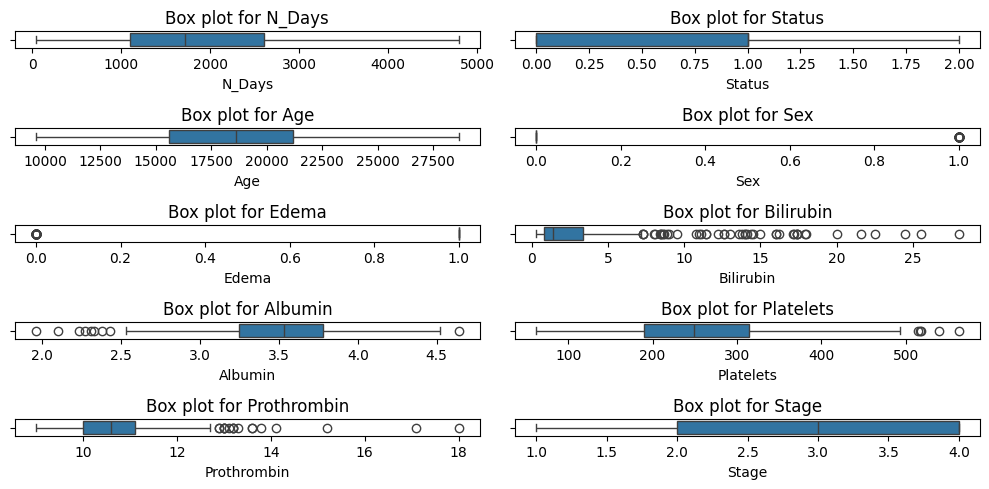

In [281]:
plot_boxplots_in_subplots(df)

In [282]:
df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1916.837379,0.679612,18498.286408,0.106796,0.844660,3.227670,3.500073,255.912621,10.733415,3.024272
std,1099.941147,0.583030,3823.705746,0.309229,0.362669,4.429421,0.423948,94.467529,1.024056,0.882042
min,41.000000,0.000000,9598.000000,0.000000,0.000000,0.300000,1.960000,62.000000,9.000000,1.000000
25%,1094.250000,0.000000,15609.250000,0.000000,1.000000,0.800000,3.247500,190.000000,10.000000,2.000000
50%,1713.500000,1.000000,18628.000000,0.000000,1.000000,1.400000,3.530000,249.000000,10.600000,3.000000
75%,2610.500000,1.000000,21200.500000,0.000000,1.000000,3.400000,3.782500,314.500000,11.100000,4.000000
max,4795.000000,2.000000,28650.000000,1.000000,1.000000,28.000000,4.640000,563.000000,18.000000,4.000000


### Handle Outliers

In [283]:
def handle_outliers(df, iqr_multiplier=1.5):

    for col in df.select_dtypes(include=[np.number]).columns:  # Only process numeric columns
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR


        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [284]:
df = handle_outliers(df)

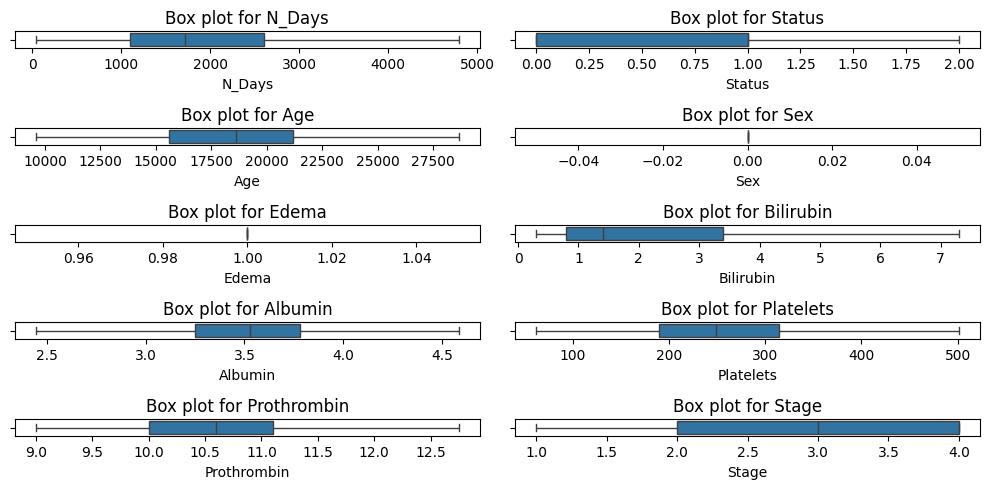

In [285]:
plot_boxplots_in_subplots(df)

In [286]:
df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.0,412.0,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1916.837379,0.679612,18498.286408,0.0,1.0,2.488592,3.503701,255.561286,10.685599,3.024272
std,1099.941147,0.583030,3823.705746,0.0,0.0,2.294273,0.412706,93.470600,0.843512,0.882042
min,41.000000,0.000000,9598.000000,0.0,1.0,0.300000,2.445000,62.000000,9.000000,1.000000
25%,1094.250000,0.000000,15609.250000,0.0,1.0,0.800000,3.247500,190.000000,10.000000,2.000000
50%,1713.500000,1.000000,18628.000000,0.0,1.0,1.400000,3.530000,249.000000,10.600000,3.000000
75%,2610.500000,1.000000,21200.500000,0.0,1.0,3.400000,3.782500,314.500000,11.100000,4.000000
max,4795.000000,2.000000,28650.000000,0.0,1.0,7.300000,4.585000,501.250000,12.750000,4.000000


### Normalize the data

In [287]:
def standardize_columns(df, columns_to_exclude):
    
    df_copy = df.copy() 
    
    for col in columns_to_exclude:
        if col not in df_copy.columns:
            df_copy[col] = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
    
    return df_copy

In [288]:
df = standardize_columns(df, ['Sex', 'Edema', 'Status'])

In [289]:
df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.0,412.0,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1916.837379,0.679612,18498.286408,0.0,1.0,2.488592,3.503701,255.561286,10.685599,3.024272
std,1099.941147,0.583030,3823.705746,0.0,0.0,2.294273,0.412706,93.470600,0.843512,0.882042
min,41.000000,0.000000,9598.000000,0.0,1.0,0.300000,2.445000,62.000000,9.000000,1.000000
25%,1094.250000,0.000000,15609.250000,0.0,1.0,0.800000,3.247500,190.000000,10.000000,2.000000
50%,1713.500000,1.000000,18628.000000,0.0,1.0,1.400000,3.530000,249.000000,10.600000,3.000000
75%,2610.500000,1.000000,21200.500000,0.0,1.0,3.400000,3.782500,314.500000,11.100000,4.000000
max,4795.000000,2.000000,28650.000000,0.0,1.0,7.300000,4.585000,501.250000,12.750000,4.000000


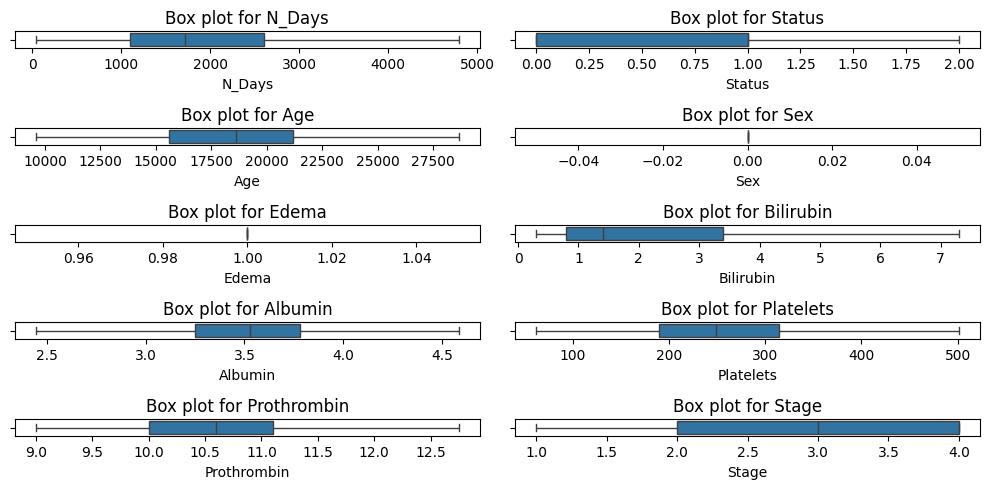

In [290]:
plot_boxplots_in_subplots(df)

### OverSampling

In [291]:
smote = SMOTE()

X = df.drop('Stage', axis=1)
y = df['Stage']

In [292]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [293]:
# Convert back to DataFrame
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Stage')], axis=1)

In [294]:
df.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
count,620.000000,620.000000,620.000000,620.0,620.0,620.000000,620.000000,620.000000,620.000000,620.000000
mean,2120.843772,0.724168,18058.079786,0.0,1.0,2.177850,3.552794,266.498339,10.649544,2.500000
std,1085.431662,0.519372,3674.347709,0.0,0.0,2.123318,0.380997,88.283332,0.776180,1.118937
min,41.000000,0.000000,9598.000000,0.0,1.0,0.300000,2.445000,62.000000,9.000000,1.000000
25%,1289.529843,0.000000,15172.956935,0.0,1.0,0.700000,3.347406,209.000000,10.038718,1.750000
50%,2080.436931,1.000000,18061.481230,0.0,1.0,1.127482,3.600000,261.438173,10.600000,2.500000
75%,2842.048863,1.000000,20538.488970,0.0,1.0,3.017479,3.812926,325.000000,11.000000,3.250000
max,4795.000000,2.000000,28650.000000,0.0,1.0,7.300000,4.585000,501.250000,12.750000,4.000000


### Split Data

In [295]:
X = df.drop(columns=['Stage'])
y = df['Stage']

In [296]:
X.describe()

,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin
count,620.000000,620.000000,620.000000,620.0,620.0,620.000000,620.000000,620.000000,620.000000
mean,2120.843772,0.724168,18058.079786,0.0,1.0,2.177850,3.552794,266.498339,10.649544
std,1085.431662,0.519372,3674.347709,0.0,0.0,2.123318,0.380997,88.283332,0.776180
min,41.000000,0.000000,9598.000000,0.0,1.0,0.300000,2.445000,62.000000,9.000000
25%,1289.529843,0.000000,15172.956935,0.0,1.0,0.700000,3.347406,209.000000,10.038718
50%,2080.436931,1.000000,18061.481230,0.0,1.0,1.127482,3.600000,261.438173,10.600000
75%,2842.048863,1.000000,20538.488970,0.0,1.0,3.017479,3.812926,325.000000,11.000000
max,4795.000000,2.000000,28650.000000,0.0,1.0,7.300000,4.585000,501.250000,12.750000


In [297]:
y.describe()

count    620.000000
mean       2.500000
std        1.118937
min        1.000000
25%        1.750000
50%        2.500000
75%        3.250000
max        4.000000
Name: Stage, dtype: float64

In [298]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Implementation of Neural Network from Scracth